In [1]:
#from google.colab import drive
#drive.mount('/gdrive')

In [2]:
%cd /gdrive/My Drive/ANNDL-H1/

In [3]:
# Load the dataset to be used for classification
#!unzip training_dataset_homework1.zip
!pip install sklearn

In [4]:
import tensorflow as tf
import numpy as np
import os
import random
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix
from PIL import Image
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import sys
#OUR CUSTOM HELPER CLASS
sys.path.append('../../../Utils/')
from DatasetHelper import DatasetHelper
from Utils import ModelHelper

tfk = tf.keras
tfkl = tf.keras.layers
print(tf.__version__)

2.10.0


In [5]:
# Download and import visualkeras library
!pip install visualkeras
import visualkeras

In [6]:
# Dataset folders 
dataset_dir = '../../data'
training_dir = os.path.join(dataset_dir, '')

In [10]:
#Create Instances Of Utils Helper
seed = 42
labels = {0:'Species1', 1:'Species2', 2:'Species3', 3:'Species4',4:'Species5', 5:'Species6', 6:'Species7', 7:'Species8'}

#Dataset Helper
dataset_helper = DatasetHelper("../../",42)

#Model Helper
model_helper   = ModelHelper("../../saved_models/",labels)
model_helper.create_seed(tf,seed);



In [14]:
#Load Dataset
X,Y = dataset_helper.load_Dataset(22)

dataset_size = X.shape[0]

Found 3542 images belonging to 2 classes.


100%|██████████| 442/442 [00:00<00:00, 458.92it/s]


In [15]:
#Split Training and Testing
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=seed, test_size=int(0.1 * dataset_size),stratify = Y)

# Normalize data
X_train = X_train/255.
X_test = X_test/255.

#Split Training and Validation
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, random_state=seed, test_size=int(0.1 * dataset_size),stratify = Y_train)

In [16]:
X_train.shape,X_test.shape,X_val.shape

((2830, 96, 96, 3), (353, 96, 96, 3), (353, 96, 96, 3))

In [17]:
Y_train.shape,Y_test.shape,Y_val.shape

((2830, 2), (353, 2), (353, 2))

In [18]:
input_shape = X_train.shape[1:] # 96*96*3
batch_size = 128
epochs = 50
input_shape

(96, 96, 3)

In [19]:
def build_model(input_shape):
    tf.random.set_seed(seed)

    # Build the neural network layer by layer
    input_layer = tfkl.Input(shape=input_shape, name='Input')

    conv1 = tfkl.Conv2D(
        filters=32,
        kernel_size=(5, 5),
        strides = (1, 1),
        padding = 'same',
        activation = 'relu',
        kernel_initializer = tfk.initializers.HeUniform(seed)
    )(input_layer)
    pool1 = tfkl.MaxPooling2D(pool_size = (2, 2))(conv1)

    conv2 = tfkl.Conv2D(
        filters=64,
        kernel_size=(3, 3),
        strides = (1, 1),
        padding = 'same',
        activation = 'relu',
        kernel_initializer = tfk.initializers.HeUniform(seed)
    )(pool1)
    pool2 = tfkl.MaxPooling2D(pool_size = (2, 2))(conv2)

    conv3 = tfkl.Conv2D(
        filters=128,
        kernel_size=(3, 3),
        strides = (1, 1),
        padding = 'same',
        activation = 'relu',
        kernel_initializer = tfk.initializers.HeUniform(seed)
    )(pool2)
    pool3 = tfkl.MaxPooling2D(pool_size = (2, 2))(conv3)

    flattening_layer = tfkl.Flatten(name='Flatten')(pool3)
    classifier_layer = tfkl.Dense(
        units=128, 
        name='Classifier', 
        activation='relu',
        kernel_initializer = tfk.initializers.HeUniform(seed)
    )(flattening_layer)
    classifier_layer = tfkl.Dropout(0.5, seed=seed)(classifier_layer)
    output_layer = tfkl.Dense(
        units=8, 
        activation='softmax', 
        kernel_initializer = tfk.initializers.GlorotUniform(seed),
        name='Output'
    )(classifier_layer)

    # Connect input and output through the Model class
    model = tfk.Model(inputs=input_layer, outputs=output_layer, name='model')

    # Compile the model
    model.compile(loss=tfk.losses.CategoricalCrossentropy(), optimizer=tfk.optimizers.Adam(), metrics='accuracy')

    # Return the model
    return model

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (InputLayer)          [(None, 96, 96, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 96, 96, 32)        2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 48, 48, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 48, 48, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 24, 24, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 24, 24, 128)       73856 

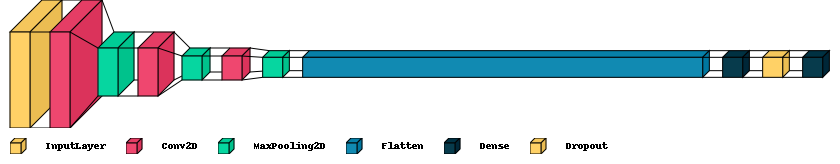

In [20]:
model = build_model(input_shape)
model.summary()
visualkeras.layered_view(model, legend=True, spacing=20, scale_xy=1)

In [21]:
X_val.shape,Y_val.shape

((353, 96, 96, 3), (353, 2))

In [ ]:
# Train the model
history = model.fit(
    x = X_train,
    y = Y_train,
    batch_size = batch_size,
    epochs = epochs,
    validation_data = (X_val, Y_val)
).history

In [ ]:
model_helper.save_model(model,'model1')

In [ ]:

model = model_helper.load_model('model1')
model.summary()

In [ ]:
#Submission Model for the challenge -> Path is the folder on the server where our script is
class model:
    def __init__(self, path):
        self.model = tf.keras.models.load_model(os.path.join(path, 'model1'))

    def predict(self, X):
        
        # Insert your preprocessing here

        out = self.model.predict(X)
        out = np.argmax(out, axis=-1)
        return out

In [ ]:
testing_index = 44
image_to_test = X_test[[testing_index],:]
#image_to_test = X_test[10,None,:]
#image_to_test = np.expand_dims(image_to_test,0)
image_to_test.shape


In [ ]:
print("Real Class: ")
print(labels[np.argmax(Y_test[testing_index])])
tester = model("")
res = tester.predict(image_to_test)
labels[res[0]]

In [ ]:
predicted_vector = model.predict(X_test)
predicted_vector.shape
labels

In [ ]:
prediction_index = 98
fig, (ax1, ax2) = plt.subplots(1,2)
fig.set_size_inches(15,5)
ax1.imshow(X_test[prediction_index])
#Each class has its own score
#We select the label with the largest prediction score 
ax1.set_title('True label: '+labels[np.argmax(Y_test[prediction_index])+1])
ax2.barh(list(labels.values()), predicted_vector[prediction_index], color=plt.get_cmap('Paired').colors)
ax2.set_title('Predicted label: '+labels[np.argmax(predicted_vector[prediction_index])])
ax2.grid(alpha=.3)
plt.show()